In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import wave
import ffmpeg

sns.set()
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

In [ ]:
def remove_close_values(arr):
    min_value = min(arr)  # 配列内の最小値を取得

    # 近い値を削除
    filtered_arr = [min_value]
    for num in arr:
        if abs(num - min_value) > 1:  # 1以内の範囲外の値を残す
            filtered_arr.append(num)

    return filtered_arr

In [6]:
stream = ffmpeg.input("./videos/audio_full.mp4") 

stream = ffmpeg.output(stream, "./test/output2.wav") 

ffmpeg.run(stream, overwrite_output=True)




audio_path_a = './test/output2.wav'
audio_path_b = './videos/kill_audio_test_trim.wav'



# 音声データAの読み込み
audio_a, sr_a = librosa.load(audio_path_a, sr=None)

# 音声データBの読み込み
audio_b, sr_b = librosa.load(audio_path_b, sr=None)

# 音声データBの長さ
len_b = len(audio_b)

# 音声データAと音声データBの相互相関を計算
correlation = np.correlate(audio_a, audio_b, mode='valid')

# 相互相関が最大となる位置を検出
max_index = np.argmax(correlation)

# sorted_arr = sorted(correlation, reverse=True)
max_indexes = [index for index, element in enumerate(correlation) if element > 850]

cors = [element for index, element in enumerate(correlation) if element > 600]

start_times = []


for idx in max_indexes:
    # 音声データBが出現する開始時間を計算（サンプル数から秒単位に変換）
    start_time = idx / sr_a
    # 音声データBが出現する終了時間を計算（開始時間に音声データBの長さを加算）
    end_time = start_time + (len_b / sr_a)
    print(str(correlation[idx]) + ', ' + str(start_time) + ' : ' + str(end_time))
    start_times.append(start_time)

start_times_new = remove_close_values(start_times)
start_times_new


944.6049, 5.205354166666667 : 5.731145833333334
1185.677, 5.205375 : 5.731166666666667
944.57996, 5.205395833333333 : 5.7311875
957.6993, 82.645375 : 83.17116666666666


[5.205354166666667, 82.645375]

(array([30., 18., 18., 14.,  6.,  6., 14.,  4., 10.,  2.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 600.,  620.,  640.,  660.,  680.,  700.,  720.,  740.,  760.,
         780.,  800.,  820.,  840.,  860.,  880.,  900.,  920.,  940.,
         960.,  980., 1000., 1020., 1040., 1060., 1080., 1100., 1120.,
        1140., 1160., 1180., 1200.], dtype=float32),
 <BarContainer object of 30 artists>)

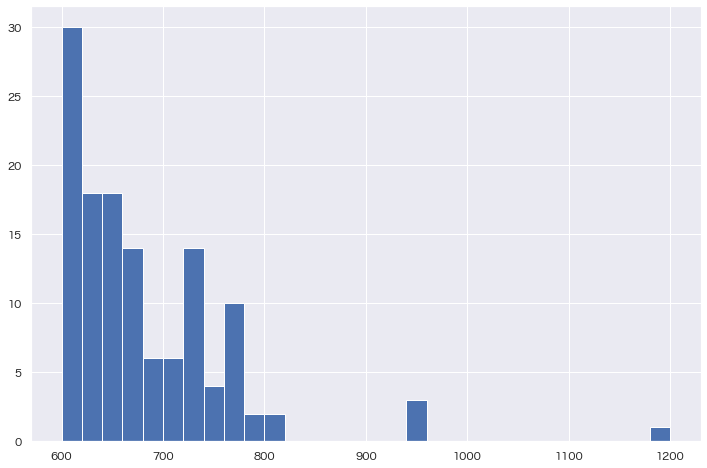

In [7]:
fig = plt.figure(figsize=(12, 8), facecolor='w', linewidth=0, edgecolor='w')
plt.hist(cors, bins=30, range=(600, 1200))

In [56]:
audio_path_a = './videos/audio_full.wav'
audio_path_b = './videos/kill_audio_test_trim.wav'

detect_audio_match(audio_path_a, audio_path_b)

6943083
944.6054, 5.2250625 : 5.750854166666667
1185.677, 5.225083333333333 : 5.750875
944.5805, 5.225104166666667 : 5.750895833333334
957.69916, 82.66508333333333 : 83.19087499999999


In [35]:
start_times = [30, 96, 255, 278, 338, 358, 469, 610, 649, 657, 695, 907, 1042, 1166]

In [42]:


def trim_wav_segment(input_file, output_file, start_time, end_time):
    # 入力ファイルをオープン
    with wave.open(input_file, 'rb') as wav_in:
        # 出力ファイルを作成
        with wave.open(output_file, 'wb') as wav_out:
            # 入力ファイルのパラメータを取得
            channels = wav_in.getnchannels()
            sample_width = wav_in.getsampwidth()
            frame_rate = wav_in.getframerate()
            total_frames = wav_in.getnframes()

            # 開始位置と終了位置をフレーム単位に変換
            start_frame = int(start_time * frame_rate)
            end_frame = int(end_time * frame_rate)

            # 出力ファイルのパラメータを設定
            wav_out.setnchannels(channels)
            wav_out.setsampwidth(sample_width)
            wav_out.setframerate(frame_rate)

            # 指定した範囲のデータを書き込む
            wav_in.setpos(start_frame)
            frames_to_write = end_frame - start_frame
            wav_out.writeframes(wav_in.readframes(frames_to_write))

# 使用例
count = 0
for start_time in start_times:
    trim_wav_segment('./videos/test_full_2.wav', './test/output_' + str(count) + '.wav', start_time, start_time+1)
    count += 1
